# Logistic Regression 

## There isn't actually "Regression"

Despite this name, Logistic Regression is actually for **classification**. 

It models the probability that a given input belows to **class 1**. 

$$
\hat{y}_i = \sigma(\mathbf{w}^\top \mathbf{x}_i + b)
$$

Note that $y$ can also be expressed as $P(y = 1 | x)$

Also note that $\mathbf{w}^\top \mathbf{x}_i$ is just a dot product.

## What's there to learn/train?

This model has two things to be trained: 

- The weights VECTOR, $\mathbf{w}$
- The bias term, $b$

As well as a new function: 
- The sigmoid function, $\sigma$ 

## The Sigmoid Function

$$
  \sigma(y) = \frac{1}{1 + e^{-y}}
  $$

This function squashes **any** real-valued input into a value between 0 and 1. 

This allows us to interpret the output as a *probability*. 

Sigmoid is used lots in Deep Learning as an **activation** function, as demonstrated in APS360!

Given the output probabilities, we classify 
- Class 1 if $ \hat{y}$ > 0.5
- Class 0 if $ \hat{y}$ ≤ 0.5

Note that: 

All **positive** values map to $ \hat{y}$ > 0.5

All **negative** values map to $ \hat{y}$ ≤ 0.5

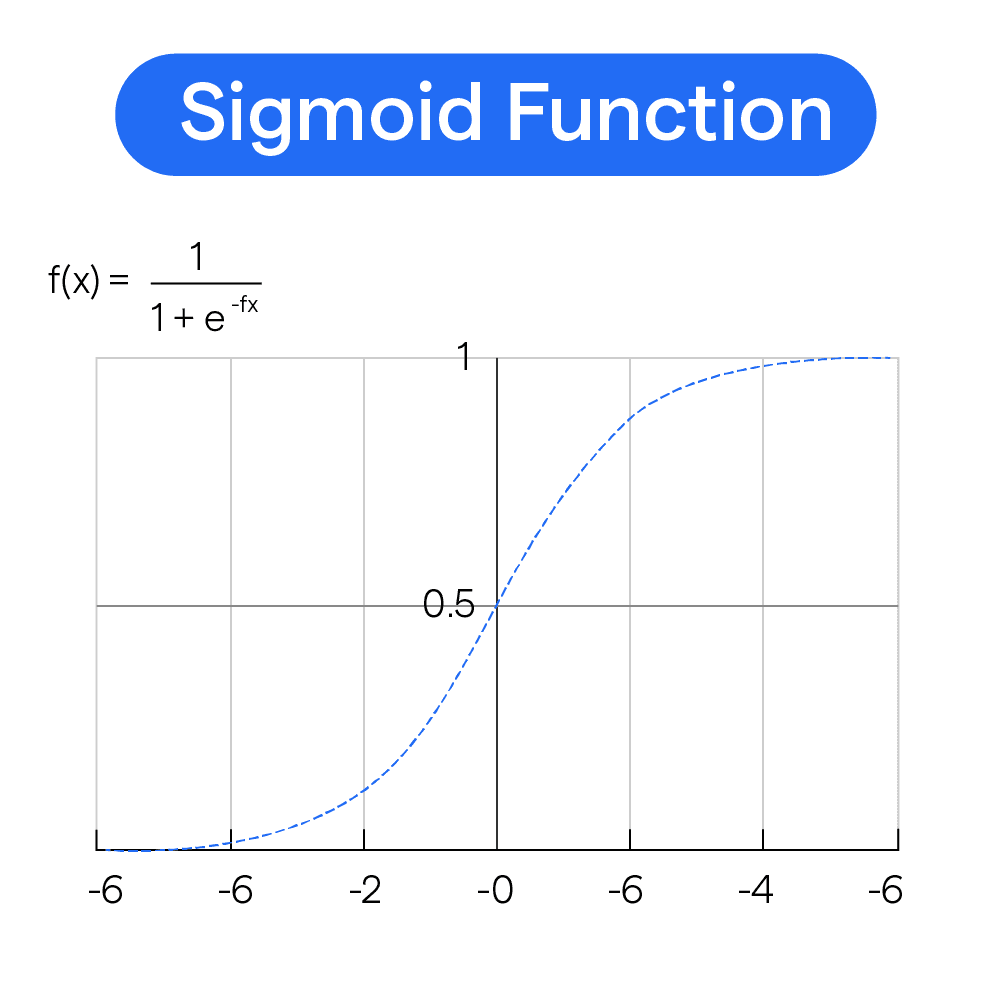

## Binary Cross-Entropy Loss Function

Similarly, we will use Gradient Descent to train the weights of the **weights** and **bias**

However, we will use another Loss Function: The **Binary Cross-Entropy Loss**

For a single sample: 

$$
\mathcal{L}(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

Overall Loss: 

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} \mathcal{L}(y_i, \hat{y}_i)
$$


BCE is better than MSE because 
- It encourages **sharp decisions** --- the logarithm severely punishes low probability confidence values. For example: 

If $ \hat{y} = 0.9 $: BCE = $-log(0.9) ≈ 0.105$ --> Small Loss

If $ \hat{y} = 0.5 $: BCE = $-log(0.9) ≈ 0.693$ --> Larger Loss

If $ \hat{y} = 0.1 $: BCE = $-log(0.9) ≈ 2.302$ --> HUGE loss!

The MSE loss function will be more tolerant of the 0.5 compared to BCE!


- Matches the **probabilistic interpretation**

Note that the output $P(y = 1 | x) = (finish later) $ directly outputs a probability.

Good news is, BCE is the negative log-likelihood of the Bernoulli distribution

## Gradient Descent Training

The procedure is essentially the same. Though the gradients are quite tedious here. 

Let:

$$
z_i = \mathbf{w}^\top \mathbf{x}_i + b
\quad \text{and} \quad
\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}
$$

---

#### Binary Cross-Entropy Loss

For a single sample:

$$
\mathcal{L}_i = -\left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Total loss over $n$ samples:

$$
\mathcal{L} = \frac{1}{n} \sum_{i=1}^{n} \mathcal{L}_i
$$

---

#### Gradient of Loss w.r.t. $\mathbf{w}$

We apply the chain rule:

$$
\frac{\partial \mathcal{L}_i}{\partial \mathbf{w}} = 
\frac{\partial \mathcal{L}_i}{\partial \hat{y}_i} \cdot
\frac{\partial \hat{y}_i}{\partial z_i} \cdot
\frac{\partial z_i}{\partial \mathbf{w}}
$$

Step-by-step:

- First:
  $$
  \frac{\partial \mathcal{L}_i}{\partial \hat{y}_i} = 
  -\left( \frac{y_i}{\hat{y}_i} - \frac{1 - y_i}{1 - \hat{y}_i} \right)
  $$

- Second (sigmoid derivative):
  $$
  \frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i (1 - \hat{y}_i)
  $$

- Third:
  $$
  \frac{\partial z_i}{\partial \mathbf{w}} = \mathbf{x}_i
  $$

Putting it all together simplifies to:

$$
\frac{\partial \mathcal{L}_i}{\partial \mathbf{w}} = (\hat{y}_i - y_i) \mathbf{x}_i
$$

Total gradient:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 
\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \mathbf{x}_i
$$

---

#### Gradient of Loss w.r.t. $b$

Same idea:

$$
\frac{\partial z_i}{\partial b} = 1
\quad \Rightarrow \quad
\frac{\partial \mathcal{L}_i}{\partial b} = (\hat{y}_i - y_i)
$$

Total gradient:

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
$$

---

#### Final Expressions 
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 
\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \mathbf{x}_i
$$

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
$$

--- 
### So then, with our update rule: 

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{\partial \text{Loss}}{\partial \mathbf{w}}
$$

$$
b := b - \alpha \cdot \frac{\partial \text{Loss}}{\partial b}
$$

## Logistic Regression is a LINEAR INEQUALITY!

The biggest flaw with this model is its linearity. 

Recall that we predict **Class 1** if 

$$
\hat{y} = \sigma(\mathbf{w}^\top \mathbf{x} + b) > 0.5
$$

Problem? 

This is literally the same as the linear inequality 

$$\mathbf{w}^\top \mathbf{x} + b > 0
$$

So if we have any nonlinear problem we need so solve, such as **XOR**, this will not work!





## Code Implementation of Logistic Regression 

### Imports

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Generate synthetic, binary classification dataset

In [3]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)
y = y.reshape(-1, 1) # shape (n_samples, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define Sigmoid Function 

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Initialize random parameters

In [6]:
n_features = X_train.shape[1]
w = np.random.randn(n_features, 1)
b = 0.0


### Training Loop

In [8]:
learning_rate = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):
    z = X_train @ w + b
    y_pred = sigmoid(z)

    # BCE
    loss = -np.mean(y_train * np.log(y_pred + 1e-15) + (1 - y_train) * np.log(1 - y_pred + 1e-15))
    losses.append(loss)

    # Gradients
    error = y_pred - y_train
    dw = (X_train.T @ error) / X_train.shape[0]
    db = np.mean(error)

    # Parameter update
    w -= learning_rate * dw
    b -= learning_rate * db

print(f"Final loss: {losses[-1]:.4f}")


Final loss: 0.1850


### Evaluation

In [9]:
# Predict on test set
def predict(X):
    z = X @ w + b
    return (sigmoid(z) > 0.5).astype(int)

y_test_pred = predict(X_test)
accuracy = np.mean(y_test_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.95


### Visualization of the linear decision boundary, in the 2D case

In [10]:
import matplotlib.pyplot as plt 

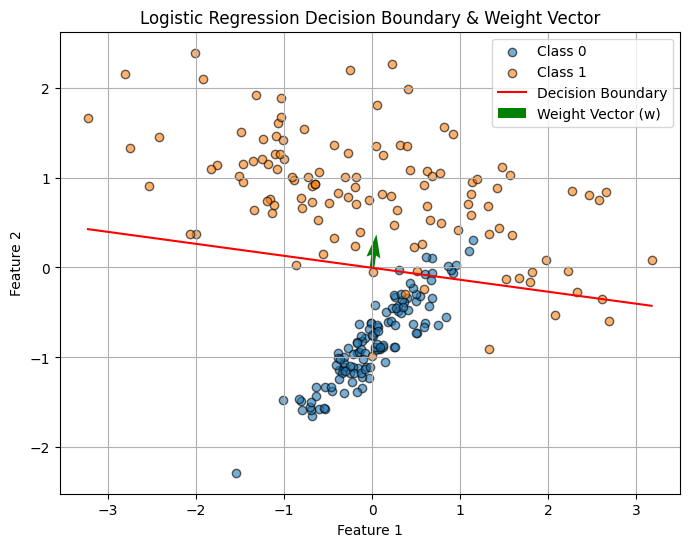

In [11]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train[y_train.flatten() == 0][:, 0], X_train[y_train.flatten() == 0][:, 1], 
            label="Class 0", alpha=0.6, edgecolor='k')
plt.scatter(X_train[y_train.flatten() == 1][:, 0], X_train[y_train.flatten() == 1][:, 1], 
            label="Class 1", alpha=0.6, edgecolor='k')

# Plot decision boundary: w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals.flatten(), color='red', label="Decision Boundary")

# Plot weight vector (arrow from origin in direction of w)
origin = np.zeros(2)
w_dir = w.flatten() / np.linalg.norm(w)  # normalize for visualization
plt.quiver(*origin, *w_dir, scale=3, scale_units='inches', color='green', label='Weight Vector (w)')

plt.title("Logistic Regression Decision Boundary & Weight Vector")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()